In [2]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers, optimizers, Sequential
from tensorflow.keras.layers import Activation , Dropout , Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-02-18 12:05:15.859691: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-18 12:05:16.048010: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 12:05:16.048142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 12:05:16.078619: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 12:05:16.142567: I tensorflow/core/platform/cpu_feature_guar

In [3]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()


/home/swaroop/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-02-18 12:05:20.574451: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 12:05:20.678282: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 12:05:20.678416: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)        │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation (Activation)         │ (None, 29, 29, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ activation_1 (Activation)       │ (None, 12, 12, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 2304)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 256)               │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 256)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 128)               │     32,896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 128)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │        129 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 679,425 (2.59 MB)

 Trainable params: 679,425 (2.59 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255, 
        rotation_range=30,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
    'meme_classifier/training_set',
    target_size=(64,64),
    batch_size=15,
    class_mode='binary')
test_set = test_datagen.flow_from_directory(
    'meme_classifier/test_set',
    target_size=(64,64),
    batch_size=15,
    class_mode='binary')

with tf.device('/GPU:0'):
    history = model.compile( optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(
        training_set,
        steps_per_epoch=991//15,
        epochs=30,
        validation_data=test_set,
        validation_steps=296//15
    )

Found 992 images belonging to 2 classes.


Found 320 images belonging to 2 classes.
Epoch 1/30


/home/swaroop/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-02-18 12:05:25.641236: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f46d400cfb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-18 12:05:25.641279: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-02-18 12:05:25.686013: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-18 12:05:25.910896: I external/local_xla/xla/stream_executor/cuda/cu

 5/66 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5858 - loss: 0.7524

I0000 00:00:1708238128.867810   20507 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


64/66 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5236 - loss: 0.7088

2024-02-18 12:05:35.653494: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-18 12:05:35.653729: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-18 12:05:35.653813: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-18 12:05:35.654513: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-18 12:05:35.654675: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-18

66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.5243 - loss: 0.7080 - val_accuracy: 0.6491 - val_loss: 0.6363
Epoch 2/30
 1/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5333 - loss: 0.6758

2024-02-18 12:05:37.248105: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:05:37.248154: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5333 - loss: 0.6758 - val_accuracy: 0.6667 - val_loss: 0.6373
Epoch 3/30


2024-02-18 12:05:37.728070: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:05:37.728114: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.6413 - loss: 0.6424 - val_accuracy: 0.7158 - val_loss: 0.5479
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7333 - loss: 0.5656 - val_accuracy: 0.6444 - val_loss: 0.6924
Epoch 5/30


2024-02-18 12:05:43.170248: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:05:43.170287: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855
2024-02-18 12:05:43.262432: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:05:43.262470: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.7568 - loss: 0.5120 - val_accuracy: 0.8175 - val_loss: 0.4100
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.5327 - val_accuracy: 0.9111 - val_loss: 0.3133
Epoch 7/30


2024-02-18 12:05:49.044974: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:05:49.045011: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.7711 - loss: 0.4664 - val_accuracy: 0.7614 - val_loss: 0.5170
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.2758 - val_accuracy: 0.7333 - val_loss: 0.8394
Epoch 9/30


2024-02-18 12:05:54.665204: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855
2024-02-18 12:05:54.820922: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:05:54.820954: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8120 - loss: 0.4010 - val_accuracy: 0.8105 - val_loss: 0.4420
Epoch 10/30
 1/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.5134

2024-02-18 12:06:00.213040: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:00.213089: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855
2024-02-18 12:06:00.409107: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:00.409138: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.5134 - val_accuracy: 0.9111 - val_loss: 0.3333
Epoch 11/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.7817 - loss: 0.4313 - val_accuracy: 0.8211 - val_loss: 0.4563
Epoch 12/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.5810 - val_accuracy: 0.9556 - val_loss: 0.1979
Epoch 13/30


2024-02-18 12:06:06.174184: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:06.174211: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855
2024-02-18 12:06:06.266044: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:06.266070: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.8258 - loss: 0.3709 - val_accuracy: 0.7860 - val_loss: 0.4813
Epoch 14/30
 1/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.5994

2024-02-18 12:06:11.841620: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:11.841644: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss: 0.5994 - val_accuracy: 0.8000 - val_loss: 0.4008
Epoch 15/30


2024-02-18 12:06:12.122977: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:12.123011: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8789 - loss: 0.3120 - val_accuracy: 0.8632 - val_loss: 0.3669
Epoch 16/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4114 - val_accuracy: 0.9333 - val_loss: 0.3791
Epoch 17/30


2024-02-18 12:06:17.530470: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:17.530510: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855
2024-02-18 12:06:17.593488: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:17.593522: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.8603 - loss: 0.3014 - val_accuracy: 0.8737 - val_loss: 0.3470
Epoch 18/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.7254 - val_accuracy: 0.7778 - val_loss: 0.6330
Epoch 19/30


2024-02-18 12:06:23.409853: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:23.409898: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855
2024-02-18 12:06:23.523455: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:23.523485: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.8399 - loss: 0.3492 - val_accuracy: 0.8702 - val_loss: 0.3598
Epoch 20/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6000 - loss: 0.4625 - val_accuracy: 0.8667 - val_loss: 0.2956
Epoch 21/30


2024-02-18 12:06:29.068835: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:29.068864: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855
2024-02-18 12:06:29.179302: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:29.179339: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.8598 - loss: 0.3122 - val_accuracy: 0.8842 - val_loss: 0.3706
Epoch 22/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.3794 - val_accuracy: 0.8444 - val_loss: 0.9735
Epoch 23/30


2024-02-18 12:06:34.649982: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:34.650034: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855
2024-02-18 12:06:34.709438: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:34.709465: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8867 - loss: 0.2851 - val_accuracy: 0.8000 - val_loss: 0.5486
Epoch 24/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9333 - loss: 0.2344 - val_accuracy: 0.7556 - val_loss: 0.5545
Epoch 25/30


2024-02-18 12:06:40.230140: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:40.230170: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.8681 - loss: 0.2977 - val_accuracy: 0.7263 - val_loss: 0.7225
Epoch 26/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8667 - loss: 0.3619 - val_accuracy: 0.8000 - val_loss: 0.4106
Epoch 27/30


2024-02-18 12:06:46.164389: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:46.164423: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.8610 - loss: 0.2918 - val_accuracy: 0.8491 - val_loss: 0.4298
Epoch 28/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9333 - loss: 0.1764 - val_accuracy: 0.8222 - val_loss: 0.9240
Epoch 29/30


2024-02-18 12:06:51.621255: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:51.621281: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855
2024-02-18 12:06:51.755117: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:51.755147: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.8815 - loss: 0.2952 - val_accuracy: 0.8807 - val_loss: 0.4077
Epoch 30/30
 1/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7333 - loss: 0.5023

2024-02-18 12:06:57.178711: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:57.178745: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7333 - loss: 0.5023 - val_accuracy: 0.8222 - val_loss: 0.4250


2024-02-18 12:06:57.465041: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15594348591509898061
2024-02-18 12:06:57.465070: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 14223232763459390855


In [5]:

model.save('meme_classifier/model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
[[0.99766314]]


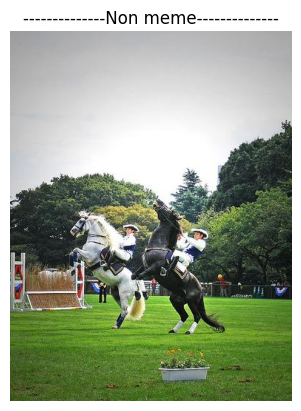

In [9]:
classifier = load_model('meme_classifier/model.h5')
path = 'datasets/coco128/images/train2017/000000000049.jpg'
img_original = load_img(path)
img = load_img(path, target_size = (64,64))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor/=255.0
pred = classifier.predict(img_tensor)
print(pred)
if pred<.5: str = '--------------Meme--------------'
else: str = '--------------Non meme--------------'
plt.imshow(img_original)
plt.axis('off')
plt.title(str)
plt.show()

In [7]:
loaded_model = load_model('meme_classifier/model.h5')

test_data_dir = 'meme_classifier/test_set'

# Load the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=15,  # Adjust batch size as needed
    class_mode='binary')

# Evaluate the model on the test data
evaluation = loaded_model.evaluate(test_set)


# Print the performance metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])


Found 320 images belonging to 2 classes.
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8591 - loss: 0.4415
Test Loss: 0.4567040205001831
Test Accuracy: 0.8484849333763123
